In [1]:
from huggingface_hub import login
# login(token=...)

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to C:\Users\2mrwm\.cache\huggingface\token
Login successful


# llama topic

In [35]:
import pandas as pd
llama3_8b = pd.read_csv('llama_results/results_llama3_70b_2.csv')

In [36]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

def topic_distribution(results_dataset):
    different_topics = results_dataset['result']
    count = Counter(different_topics)
    
    topics = [topic for topic in count]
    height = [n for n in count.values()]
    bar_df = pd.DataFrame()
    bar_df['topic'] = topics
    bar_df['count'] = height
    sns.barplot(data=bar_df, x='count', y='topic', palette='Blues_r')
    
    total_count = np.sum(np.array(height))
    for t in count:
        print(f' The percentage for {t} is: {round(((count[t] / total_count) * 100), 2)}%')
    


 The percentage for Self-Improvement is: 2.15%
 The percentage for Food and Dining is: 12.83%
 The percentage for Meme is: 18.61%
 The percentage for Relationships is: 6.42%
 The percentage for Art and Culture is: 7.08%
 The percentage for Personal Vlogs & Daily Life  is: 24.76%
 The percentage for Fashion and Beauty is: 9.85%
 The percentage for Health and Fitness is: 8.03%
 The percentage for Politics and Social Issues is: 7.43%
 The percentage for Gender is: 1.11%
 The percentage for Crime is: 1.51%
 The percentage for Other is: 0.23%
None


C:\Users\2mrwm\AppData\Local\Temp\ipykernel_8188\2591719452.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_df, x='count', y='topic', palette='Blues_r')


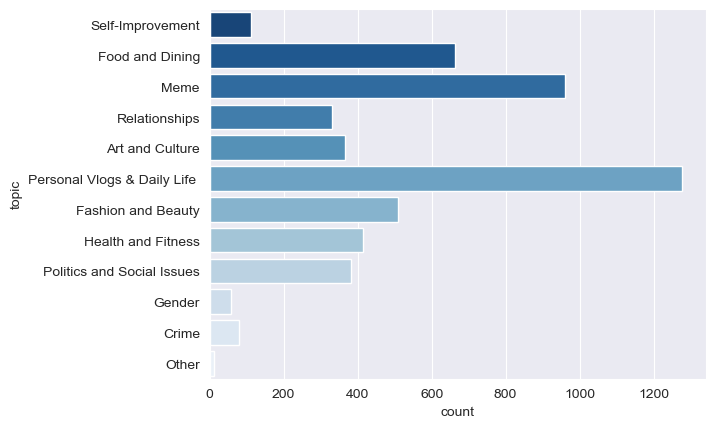

In [37]:
llama3_70b = pd.read_csv('llama_results/results_llama3_70b_2.csv')
llama3_70b_topic_distribution = topic_distribution(llama3_70b)
print(llama3_70b_topic_distribution)

In [38]:
from sklearn.metrics import accuracy_score, classification_report
test_set_1 = pd.read_csv('llama_results/results_testset.csv')
test_set_2 = pd.read_csv('test_sets/labelled.csv', delimiter=';')

results_set = test_set_1.copy()
conv_dict = {'Crime': 'politics', 'Gender': 'politics', 'Food and Dining': 'food', 
             'Personal Vlogs & Daily Life ': 'vlog', 'Health and Fitness': 'health', 
             'Meme': 'meme', 'Politics and Social Issues': 'politics', 'Art and Culture': 'art',
             'Self-Improvement': 'self', 'Fashion and Beauty': 'beauty', 'Relationships': 'relationships', 'Other': 'misc'}


group_meme = True
if group_meme:
    conv_dict2 = {'misc': 'meme'}
    conv_dict['Other'] = 'meme'
    for manual_topic, new_manual_topic in conv_dict2.items():
        test_set_2['manual_topic'] = test_set_2['manual_topic'].replace(manual_topic, new_manual_topic)

for llama_topic, manual_topic in conv_dict.items():
    results_set['result'] = results_set['result'].replace(llama_topic, manual_topic)


performance = classification_report(y_true=test_set_2['manual_topic'], y_pred=results_set['result'])

In [39]:
print(performance)

               precision    recall  f1-score   support

          art       0.41      0.53      0.46        17
       beauty       0.80      0.77      0.78        26
         food       0.70      0.93      0.80        28
       health       0.28      0.71      0.40         7
         meme       0.50      0.40      0.45        72
     politics       0.50      0.82      0.62        22
relationships       0.83      0.28      0.42        54
         self       0.60      0.55      0.57        11
         vlog       0.52      0.63      0.57        62

     accuracy                           0.56       299
    macro avg       0.57      0.62      0.56       299
 weighted avg       0.60      0.56      0.55       299


# llama sentiment

 The percentage for Neutral is: 34.86%
 The percentage for Very Negative is: 41.33%
 The percentage for Positive is: 11.59%
 The percentage for Negative is: 5.04%
 The percentage for Very positive is: 7.17%


C:\Users\2mrwm\AppData\Local\Temp\ipykernel_8188\2591719452.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_df, x='count', y='topic', palette='Blues_r')


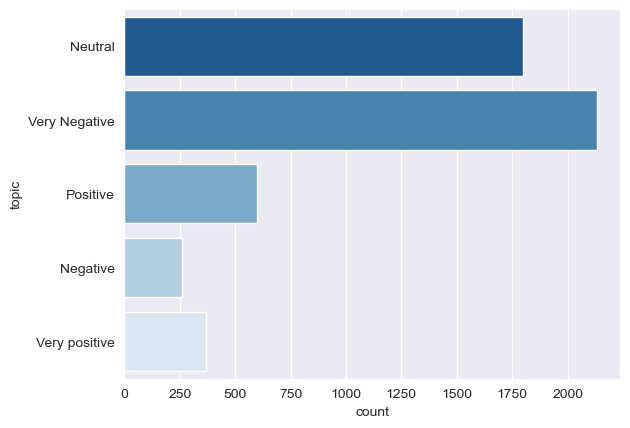

In [40]:
llama_sent = pd.read_csv('llama_results/results_llama3_sent.csv')
sent_dist = topic_distribution(llama_sent)

In [41]:
from sklearn.metrics import accuracy_score, classification_report
sent_test_set_1 = pd.read_csv('llama_results/results_llama3_sent_testset.csv')
test_set_2 = pd.read_csv('test_sets/labelled.csv', delimiter=';')

sent_results_set = sent_test_set_1.copy()
conv_dict = {'Very Negative': 'neg', 'Negative': 'neg', 'Neutral': 'neu', 'Positive': 'pos', 'Very positive': 'pos'}

for llama_topic, manual_topic in conv_dict.items():
    sent_results_set['result'] = sent_results_set['result'].replace(llama_topic, manual_topic)


sent_performance = classification_report(y_true=test_set_2['manual_sent'], y_pred=sent_results_set['result'])

In [42]:
print(sent_performance)

              precision    recall  f1-score   support

         neg       0.52      0.80      0.63        95
         neu       0.34      0.46      0.39        68
         pos       0.84      0.39      0.53       136

    accuracy                           0.54       299
   macro avg       0.57      0.55      0.52       299
weighted avg       0.63      0.54      0.53       299


# Creation of Complete dataset

In [43]:
# full_dataset = pd.read_csv('misc_test_csvs/roberta_analyzed.csv').iloc[:, 3:]
# full_dataset['top_llama3'] = llama3_70b['result']
# full_dataset['sent_llama3'] = llama_sent['result']
# full_dataset.head()
# print(full_dataset[:10])
# full_dataset.to_csv('full_pred_dataset.csv')

                     file_name  \
0  eng_7236990415663041800.txt   
1  eng_7241474780250049800.txt   
2  eng_7254353547062414600.txt   
3  eng_7256036139000155400.txt   
4  eng_7261998315774938400.txt   
5  eng_7262090078875405600.txt   
6  eng_7262357177975770400.txt   
7  eng_7262376835772583200.txt   
8  eng_7262386156543757600.txt   
9  eng_7262428933918887200.txt   

                                       original_text  perplexity  \
0    Get your fucking ass up and work.  It seems ...   23.634033   
1    Let's make a kimchi stew.  So I've got all t...   15.305075   
2    You don't even have a cat.  But for cat,  wh...   86.620033   
3    I can't see anything that I don't like about...   19.748863   
4    tea cakes where's the tea  I mean it seems l...   73.973022   
5    this is my meal  I call this girl dinner  gi...   73.760345   
6    do you recognize this song  this song is Har...   24.535637   
7    yeah I'm pretty much not afraid of anything ...   88.628685   
8    so I was

# Full test set

In [51]:
# full_testset = pd.read_csv('labelled_test_set_5labels.csv').iloc[:, 3:]
# full_testset['top_llama3'] = test_set_1['result']
# full_testset['sent_llama3'] = sent_test_set_1['result']
# full_testset = full_testset.rename(columns={'manual_topic': 'top_manual', 'manual_sent': 'sent_manual'})
# full_testset.head()
# print(full_testset[:10])
# full_testset.to_csv('full_pred_testset.csv')

                     file_name  \
0  nld_7320139446844788000.txt   
1  nld_7407732753573236000.txt   
2  nld_7379315566210829600.txt   
3  nld_7421155007128538400.txt   
4  eng_7395589633645530400.txt   
5  nld_7412301455677197600.txt   
6  eng_7275333223557696800.txt   
7  eng_7331499005588852000.txt   
8  nld_7385449383510183200.txt   
9  nld_7418995107052916000.txt   

                                       original_text   perplexity  \
0  make this delicious patty if you don't want to...  4,82962E+15   
1  Since I've been here for 20 weeks today, I tho...  3,38571E+16   
2  when I first went into the gym I was really pa...  2,35133E+15   
3  so diddy had 1,000 bottles of baby oil in his ...  3,54489E+15   
4    And now I want to sit back and relax and enj...  2,89736E+14   
5  I can eat coconuts. I can't eat myself. Of cou...  2,04386E+16   
6    Oh, my goodness,  I love this question. Um, ...  5,61929E+15   
7    Hey, what's going on?  Where did you get all...  2,34311E+15   
8  g